# LimitSetting

### Adaptation of https://github.com/asantra/DiPhotonClassicCodeRepository/tree/master/LimitSetting in a Jupyter notebook

#### thomas.mccauley@cern.ch

In [1]:
import ROOT
import math

Welcome to JupyROOT 6.07/07


Let's read in the root file and get the histograms and draw a few:

In [2]:
file_in = ROOT.TFile('./hist_T5Wg.root', 'READ')
file_in.ls()

TFile**		./hist_T5Wg.root	
 TFile*		./hist_T5Wg.root	
  KEY: TH1F	h_All_Signal_MET;1	All Signal MET
  KEY: TH1F	h_DoublePhoton_Signal_MET;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhoton_Signal_MET_NoTriggerCut;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhoton_Signal_MET_AsymPtCut;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhoton_Signal_MET_InvMassCut;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhoton_Signal_MET_InvMassAndAsymPtCut;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhoton_Signal_MET_HighInvMassAndAsymPtCut;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhotonFromThree_Signal_MET;1	Di-photon signal MET
  KEY: TH1F	h_DoublePhoton_Signal_METExpected;1	Double Photon MET, MET>100
  KEY: TH1F	h_DoublePhoton_Signal_METJESUpExpected;1	Double Photon MET, MET>100
  KEY: TH1F	h_DoublePhoton_Signal_METJESDownExpected;1	Double Photon MET, MET>100
  KEY: TH1F	h_DoublePhoton_Signal_METExpectedUnweighted;1	Double Photon MET, MET>100
  KEY: TH1F	h_DoublePhoton_Signal_METJESUpExpectedUnweighted;1	D

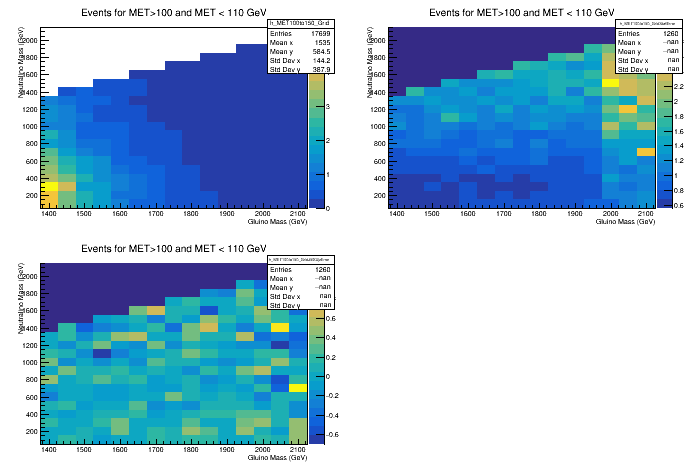

In [3]:
c1 = ROOT.TCanvas()
c1.Divide(2,2)

h1 = file_in.Get('h_MET100to150_Grid')
h1stat = file_in.Get('h_MET100to150_GridStatError')
h1up = file_in.Get('h_MET100to150_GridJESUpError')

c1.cd(1)
h1.Draw("colz")
c1.cd(2)
h1stat.Draw("colz")
c1.cd(3)
h1up.Draw("colz")

c1.Draw()

Let's get the rest of the histograms from the root file:

In [4]:
h1 = file_in.Get('h_MET100to150_Grid')
h2 = file_in.Get('h_MET150to250_Grid')
h3 = file_in.Get('h_MET250to350_Grid')

h1stat = file_in.Get('h_MET100to150_GridStatError')
h2stat = file_in.Get('h_MET150to250_GridStatError')
h3stat = file_in.Get('h_MET250to350_GridStatError')

h1up = file_in.Get('h_MET100to150_GridJESUpError')
h2up = file_in.Get('h_MET150to250_GridJESUpError')
h3up = file_in.Get('h_MET250to350_GridJESUpError')

h1down = file_in.Get('h_MET100to150_GridJESDownError')
h2down = file_in.Get('h_MET150to250_GridJESDownError')
h3down = file_in.Get('h_MET250to350_GridJESDownError')

Now specify a range of masses and scale factors (from where do they come?)

In [5]:
# Masses of either the gluino (T5gg) or squark (T6gg)

masses = [1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050,2100]
neutralino_masses = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]

scale_factor = 0.993 * 0.986 * 0.983 * 0.983
h1.Scale(scale_factor)
h2.Scale(scale_factor)
h3.Scale(scale_factor)

Now we make the counting files with the template:

```
imax 3  number of channels
jmax 2  number of backgrounds
kmax *  number of nuisance parameters (sources of systematic uncertainties)
------------
bin         1   2   3
observation 121 37  9
------------
bin                 1       1       1       2       2       2       3       3       3
process             t5gg    qcd     ewk     t5gg    qcd     ewk     t5gg    qcd     ewk
process             0       1       2       0       1       2       0       1       2
rate                T5WG1   104.07  16.84   T5WG2   29.58   7.33    T5WG3   7.07    2.31
------------
mcStats     lnN     MCS1    -       -       MCS2    -       -       MCS3    -       -
lumi        lnN     1.046   -       -       1.046   -       -       1.046   -       -
phoSf       lnN     1.025   -       -       1.025   -       -       1.025   -       -
jes         lnN     JES1    -       -       JES2    -       -       JES3    -       -
diEmPtWt    lnN     -       1.15    -       -       1.15    -       -       1.15    -
nJetsWt     lnN     -       1.15    -       -       1.15    -       -       1.15    -
qcdFake     lnN     -       1.417   -       -       1.714   -       -       1.423   -
qcdStats    lnN     -       1.036   -       -       1.068   -       -       1.088   -
ewkFake     lnN     -       -       1.195   -       -       1.195   -       -       1.195
ewkStats    lnN     -       -       1.036   -       -       1.054   -       -       1.097
```

which is contained in counting_T5Wg_XXX_YYY.txt

In [6]:
import re

temp_file = open('./counting_T5Wg_XXX_YYY.txt', 'r')
lines = [line for line in temp_file.readlines()]

for i in range(1,len(masses)+1):
    for j in range(1,len(neutralino_masses)+1):
        
        if h3.GetBinContent(i,j) != 0.0:
         
            uncertUp1 = math.fabs(h1up.GetBinContent(i,j))
            uncertUp2 = math.fabs(h2up.GetBinContent(i,j))
            uncertUp3 = math.fabs(h3up.GetBinContent(i,j))
            uncertDown1 = math.fabs(h1down.GetBinContent(i,j))
            uncertDown2 = math.fabs(h2down.GetBinContent(i,j))
            uncertDown3 = math.fabs(h3down.GetBinContent(i,j))
            
            file_name = 'counting_T5Wg_'+str(masses[i-1])+'_'+str(neutralino_masses[j-1])+'.txt'
            file_name = './counting_files/'+file_name
            new_file = open(file_name, 'w')
            
            for line in lines:
                if re.search('T5WG', line):
                    l = line.replace('T5WG1', str(round(h1.GetBinContent(i,j),3)))
                    l = l.replace('T5WG2', str(round(h2.GetBinContent(i,j),3))) 
                    l = l.replace('T5WG3', str(round(h3.GetBinContent(i,j),3)))
                    new_file.write(l)
                elif re.search('MCS', line):
                    l = line.replace('MCS1', str(round(1.0 + h1stat.GetBinContent(i,j),4)))
                    l = l.replace('MCS2', str(round(1.0 + h2stat.GetBinContent(i,j),4))) 
                    l = l.replace('MCS3', str(round(1.0 + h3stat.GetBinContent(i,j),4))) 
                    new_file.write(l)
                elif re.search('JES', line):
                    l = line.replace('JES1',  str(round(1.0 + max(uncertUp1, uncertDown1),4))) 
                    l = l.replace('JES2',  str(round(1.0 + max(uncertUp2, uncertDown2),4)))
                    l = l.replace('JES3',  str(round(1.0 + max(uncertUp3, uncertDown3),4)))
                    new_file.write(l)
                else:
                    new_file.write(line)
                    
            new_file.close()
            

Now the datacards should be in the counting_files dir and make the shell script to run the combine commands which follow the template:
```
combine -M Asymptotic counting_files/counting_T5Wg_${i}_${j}.txt > limit_files/limit_t6gg_${i}_${j}.txt
```

In [11]:
limit_file = open('makelimitfiles.sh', 'w')

for i in masses:
    for j in neutralino_masses:
        if j < i:
            command = 'combine -M Asymptotic counting_files/'
            command += 'counting_T5Wg_'+str(i)+'_'+str(j)+'.txt'
            command += ' > limit_files/'
            command += 'limit_T5Wg_'+str(i)+'_'+str(j)+'.txt'
            limit_file.write(command+'\n')

The combine tool can be run stand-alone in Swan.

Instructions are here:
https://indico.cern.ch/event/577649/#b-229590-higgs-combine-tool-mi

Once the tool is built and the environment is set one can run the shell script made above and create the limit files.

The next step is to parse the limit files to create four histograms. A limit file (e.g. limit_t6gg_2000_1000.txt) looks like this:

```
At r = 25.550304:	q_mu = 4.42079	q_A  = 2.74014	CLsb = 0.01527	CLb  = 0.30585	CLs  = 0.04993

 -- Asymptotic -- 
Observed Limit: r < 25.5503
Expected  2.5%: r < 14.6732
Expected 16.0%: r < 20.8888
Expected 50.0%: r < 31.9688
Expected 84.0%: r < 50.7008
Expected 97.5%: r < 77.9536

Done in 0.00 min (cpu), 0.04 min (real)
```

We want to fetch the information:

"Down" : 16.0%

"Mid" : 50.0%

"Up" : 84.0%

"Observed"

However, for some reason not all limit files are produced when running in stand-alone. For now, let's take the files already produced in CMSSW_7_1_5.

In [15]:
import os
import numpy as np
import re

limdir = './limit_files/'

limit_files = os.listdir(limdir)

# these number should come from the arrays we defined earlier rather than hard-coded
mSquark = np.array([1375.0, 1425.0, 1475.0, 1525.0, 1575.0, 1625.0, 1675.0, 1725.0, 1775.0, 1825.0, 1875.0, 1925.0, 1975.0, 2025.0, 2075.0, 2125.0])
mNeutralino = np.array([50.0,150.0,250.0,350.0,450.0,550.0,650.0,750.0,850.0,950.0,1050.0,1150.0,1250.0,1350.0,1450.0,1550.0,1650.0,1750.0,1850.0,1950.0,2050.0,2150.0])

nbinsx = len(mSquark)-1
nbinsy = len(mNeutralino)-1

hExpLimUp = ROOT.TH2D('up', 'up', nbinsx, mSquark, nbinsy, mNeutralino)
hExpLimMid = ROOT.TH2D('mid', 'mid', nbinsx, mSquark, nbinsy, mNeutralino)
hExpLimDown = ROOT.TH2D('down', 'down', nbinsx, mSquark, nbinsy, mNeutralino)
hObsLim = ROOT.TH2D('obs', 'obs', nbinsx, mSquark, nbinsy, mNeutralino)
  
for i in masses:
    for j in neutralino_masses:
        if j < i and j < 1800:
            
            with open(limdir+'limit_T5Wg_'+str(i)+'_'+str(j)+'.txt') as fin:
                for line in fin:
                    
                    if re.search('Observed', line):
                        l = line.split('<')
                        v = float(l[1].strip())
                        if v > 0:
                            hObsLim.SetBinContent(hObsLim.GetXaxis().FindBin(i), hObsLim.GetYaxis().FindBin(j), v)
            
                    if re.search('16.0%', line):
                        l = line.split('<')
                        v = float(l[1].strip())
                        if v > 0:
                            hExpLimDown.SetBinContent(hExpLimDown.GetXaxis().FindBin(i), hExpLimDown.GetYaxis().FindBin(j), v)
            
                    if re.search('50.0%', line):
                        l = line.split('<')
                        v = float(l[1].strip())
                        if v > 0:
                            hExpLimMid.SetBinContent(hExpLimMid.GetXaxis().FindBin(i), hExpLimMid.GetYaxis().FindBin(j), v)
            
                    if re.search('84.0%', line):
                        l = line.split('<')
                        v = float(l[1].strip())
                        if v > 0:
                            hExpLimUp.SetBinContent(hExpLimUp.GetXaxis().FindBin(i), hExpLimUp.GetYaxis().FindBin(j), v)

    
hObsLim.GetZaxis().SetRangeUser(0.0, 40.0)
hExpLimDown.GetZaxis().SetRangeUser(0.0, 40.0)
hExpLimMid.GetZaxis().SetRangeUser(0.0, 40.0)
hExpLimUp.GetZaxis().SetRangeUser(0.0, 40.0)

Warning in <TFile::Append>: Replacing existing TH1: up (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mid (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: down (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: obs (Potential memory leak).


Let's make a new canvas and see what the histograms look like:

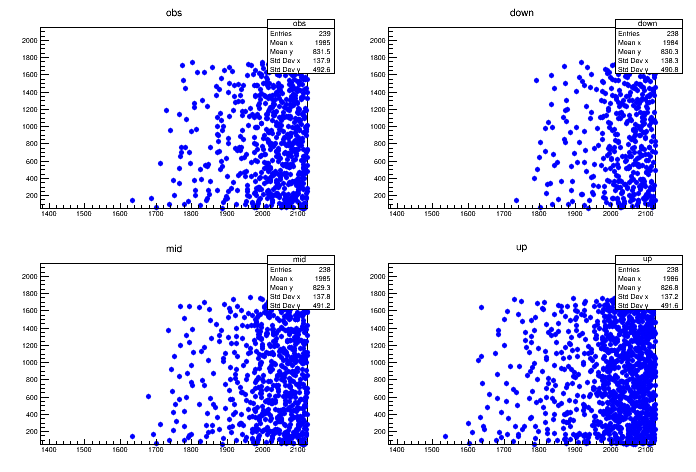

In [16]:
c2 = ROOT.TCanvas()
c2.Divide(2,2)

c2.cd(1)
hObsLim.Draw()

c2.cd(2)
hExpLimDown.Draw()

c2.cd(3)
hExpLimMid.Draw()

c2.cd(4)
hExpLimUp.Draw()

c2.Draw()

The following all comes from https://github.com/asantra/DiPhotonClassicCodeRepository/blob/master/LimitSetting/DrawLimitCanvas.C

In [24]:
def MakeLimitGraph(h):
    
    g = ROOT.TGraph()
    n = 0
    m = 19

    for i in range(1, m+1):
        
        x = 0.0
        y = h.GetYaxis().GetBinCenter(i)
        
        for j in range(1, h.GetNbinsX() + 1):
            
            xLow = h.GetXaxis().GetBinCenter(j)
            xHigh = h.GetXaxis().GetBinCenter(1+j)
            zLow = h.GetBinContent(j, i)
            zHigh = h.GetBinContent(1 + j, i)

            if zLow < 1.0 and zHigh > 1.0: 
                x = xLow + (xHigh - xLow) * (1.0 - zLow) / (zHigh - zLow)

                g.SetPoint(n, x, y)
                n += 1
                break
        
    return g
    

def ScaleLimit(h, s, scaleByXSec, sigma):
    
    h_new = h.Clone(s)
    
    for i in range(1, h_new.GetNbinsX()+1):
        for j in range(1, h_new.GetNbinsY()+1):
            
            m = h_new.GetXaxis().GetBinCenter(i)
            r = h_new.GetBinContent(i, j)
            foundM = False
            
            if m == 1487.5:
                m = 1500.0
            
            with open('./SusyCrossSections13TevGluGlu.txt') as f_xSec:
                for line in f_xSec:
                    
                    l = line.split()
                    mSusy = float(l[0])
                    xSec = float(l[1])
                    unc = float(l[2])
                    
                    if mSusy == m: # careful!
                        if scaleByXSec:
                            r *= xSec
                        r /= 1.0 + sigma * unc / 100.0
                        foundM = True
                        break
            if not foundM:
                r = -1.0
                
            h_new.SetBinContent(i, j, r)
    
    return h_new

In [25]:
h_xSecLimit = ScaleLimit(hObsLim, 'obs', True, 0.0)
h_observedLimitLow = ScaleLimit(hObsLim, 'obs', False, -1.0)
h_observedLimitHigh = ScaleLimit(hObsLim, 'obs' , False, 1.0)
    
g_expectedLimit = MakeLimitGraph(hExpLimMid)
g_expectedLimitLow = MakeLimitGraph(hExpLimDown)
g_expectedLimitHigh = MakeLimitGraph(hExpLimUp)

g_observedLimit = MakeLimitGraph(hObsLim)
g_observedLimitLow = MakeLimitGraph(h_observedLimitLow)
g_observedLimitHigh = MakeLimitGraph(h_observedLimitHigh)

ROOT.gStyle.SetPadRightMargin(0.16)
c_limit = ROOT.TCanvas('c_limit', '', 580, 620)
c_limit.SetLogz()
    
red = np.array([0.5, 0.5, 1.0, 1.0, 1.0])
green = np.array([0.5, 1.0, 1.0, 0.6, 0.5])
blue = np.array([1.0, 1.0, 0.5, 0.4, 0.5])
length = np.array([0.0, 0.34, 0.61, 0.84, 1.0])
                 
table = ROOT.TColor.CreateGradientColorTable(5, length, red, green, blue, 255)
limitPalette = [table+i for i in range(1,255+1)]

IOError: [Errno 2] No such file or directory: './SusyCrossSections13TevGluGlu.txt'

In [ ]:
h_xSecLimit.GetXaxis().SetTitle('M_{#tilde{g}} (GeV)')
h_xSecLimit.GetYaxis().SetTitle('M_{#tilde{#chi}_{1}^{0}} (GeV)  ')
h_xSecLimit.GetZaxis().SetLabelOffset(-0.003)
h_xSecLimit.GetZaxis().SetLabelSize(0.03)
h_xSecLimit.GetZaxis().SetTitleOffset(0.9)
h_xSecLimit.GetZaxis().SetLabelSize(0.04)
h_xSecLimit.GetZaxis().SetTitle('95% CL limit on #sigma (pb)    ')
h_xSecLimit.SetContour(255)
h_xSecLimit.GetZaxis().SetRangeUser(0.004, 0.007)
h_xSecLimit.SetTitle('')
h_xSecLimit.Draw('colz')

g_expectedLimit.SetLineColor(ROOT.kRed+1)
g_expectedLimit.SetLineWidth(2)
g_expectedLimit.Draw('C same')
    
g_expectedLimitLow.SetLineColor(ROOT.kRed+1)
g_expectedLimitLow.SetLineStyle(2)
g_expectedLimitLow.SetLineWidth(2)
g_expectedLimitLow.Draw('C same')
    
g_expectedLimitHigh.SetLineColor(ROOT.kRed+1)
g_expectedLimitHigh.SetLineStyle(2)
g_expectedLimitHigh.SetLineWidth(2)
g_expectedLimitHigh.Draw('C same')
    
g_observedLimit.SetLineWidth(2)
g_observedLimit.Draw('C same')
    
g_observedLimitLow.SetLineStyle(2)
g_observedLimitLow.SetLineWidth(2)
g_observedLimitLow.Draw('C same')
    
g_observedLimitHigh.SetLineStyle(2)
g_observedLimitHigh.SetLineWidth(2)
g_observedLimitHigh.Draw('C same')

le_limit = ROOT.TLegend(0.19, 0.72, 0.48, 0.84)
le_limit.SetFillStyle(0)
le_limit.SetLineColor(ROOT.kWhite)
le_limit.SetTextSize(0.0325)
le_limit.SetTextFont(42)
le_limit.AddEntry(g_observedLimit, 'Obs. limit', 'l')
le_limit.AddEntry(g_observedLimitLow, 'Obs. limit #pm 1 #sigma_{th}','l')
le_limit.AddEntry(g_expectedLimit, 'Exp. limit', 'l')
le_limit.AddEntry(g_expectedLimitLow, 'Exp. limit #pm 1 #sigma_{ex}','l')
le_limit.Draw('same');
    
la_limit = ROOT.TLatex()
la_limit.SetNDC()
    
la_limit.SetTextAlign(13)
la_limit.SetTextSize(0.044)
la_limit.SetTextFont(42)
la_limit.DrawLatex(0.6, 0.998, '2.3 fb^{-1} (13 TeV)')
    
la_limit.SetTextAlign(11)
la_limit.SetTextSize(0.044)
la_limit.SetTextFont(62)
la_limit.DrawLatex(0.2, 0.96, 'CMS')
    
la_limit.SetTextAlign(11)
la_limit.SetTextSize(0.044)
la_limit.SetTextFont(42)
la_limit.DrawLatex(0.3, 0.96, 'Preliminary')
    
la_limit.SetTextSize(0.04)
la_limit.SetTextFont(42)
la_limit.DrawLatex(0.2, 0.9, 'pp #rightarrow #tilde{g}#tilde{g}, #tilde{g} #rightarrow qq#tilde{#chi}_{1}^{0}, #tilde{#chi}_{1}^{0} #rightarrow #gamma#tilde{G}')
    
la_limit.DrawLatex(0.2, 0.85, 'NLO + NLL exclusion')

c_limit.Draw()

Hmm, not bad. It's the same as what comes out of the github version. Don't know if it makes sense but will have to check.